In [4]:
!pip install causalnex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 5.4 MB/s 
     |████████████████████████████████| 76 kB 5.6 MB/s 
     |████████████████████████████████| 1.9 MB 58.7 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=81ad6d6db9a308d4793a882fd9b91e4f13bafca57e395122565b76d2bac9403b
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.1
    Uninstalling wrapt-1.14.1:
      Successfully uninstalled wrapt-1.14

In [5]:
! apt install libgraphviz-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [8]:
!pip install pygraphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pygraphviz-1.7.zip (118 kB)
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-linux_x86_64.whl size=165765 sha256=5463ee024c6d4542c356b32fe1c550de6b3e45e83757ee89817701979aa8745f
  Stored in directory: /root/.cache/pip/wheels/8c/bc/0c/ac35392b72556e75107ff610cb31b313e8471918a6d280e34c
Successfully built pygraphviz


In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from causalnex.structure.notears import from_pandas,from_pandas_lasso
from causalnex.structure import StructureModel
from causalnex.network import BayesianNetwork
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.discretiser import Discretiser
from causalnex.evaluation import classification_report,roc_auc
import networkx as nx

from IPython.display import Image


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv("/content/drive/MyDrive/Data/data_final.csv")


In [10]:
data.head()

,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,132.90,1326.0,0.0869,0.07017,74.08,24.99,158.8,1956.0,0.2416,0.1860,1
1,130.00,1203.0,0.1974,0.12790,94.03,23.57,152.5,1709.0,0.4504,0.2430,1
2,135.10,1297.0,0.1980,0.10430,94.44,22.54,152.2,1575.0,0.4000,0.1625,1
3,82.57,477.1,0.1578,0.08089,27.19,15.47,103.4,741.6,0.5355,0.1741,1
4,119.60,1040.0,0.1127,0.07400,53.91,22.88,153.2,1606.0,0.3784,0.1932,1


##### Split data into training and hold-out set 

In [11]:
X = data.iloc[:,:-1]
y = data[['diagnosis']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


### Scaling 

In [13]:
scaler = MinMaxScaler()
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

In [14]:
causal_data = X_train_scaler.join(y_train)
causal_data.head()

,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,0.670659,0.581978,0.202358,0.188632,0.376977,0.504249,0.487001,0.366361,0.243562,0.331734,NaN
1,0.689510,0.573100,0.529666,0.409666,0.363530,0.601765,0.588830,0.457742,0.700013,0.712937,1.0
2,0.435130,0.317126,0.160000,0.145813,0.189000,0.317934,0.312351,0.194499,0.188042,0.243374,1.0
3,0.421047,0.318038,0.049941,0.076038,0.076782,0.311942,0.308108,0.203358,0.102679,0.227330,1.0
4,0.325017,0.205692,0.046012,0.121647,0.187958,0.209523,0.199954,0.117822,0.040404,0.187416,1.0


In [15]:
causal_data.dropna(subset=['diagnosis'],inplace=True)

In [16]:
causal_data.head()

,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
1,0.689510,0.573100,0.529666,0.409666,0.363530,0.601765,0.588830,0.457742,0.700013,0.712937,1.0
2,0.435130,0.317126,0.160000,0.145813,0.189000,0.317934,0.312351,0.194499,0.188042,0.243374,1.0
3,0.421047,0.318038,0.049941,0.076038,0.076782,0.311942,0.308108,0.203358,0.102679,0.227330,1.0
4,0.325017,0.205692,0.046012,0.121647,0.187958,0.209523,0.199954,0.117822,0.040404,0.187416,1.0
5,0.680639,0.542731,0.704519,0.603540,0.234739,0.480824,0.511687,0.342796,0.758639,0.800236,1.0


In [53]:
def structuremodel(sm,label):
    viz = plot_structure(sm,
                         graph_attributes={"scale": "2.0", 'size':2.5,"label":label},
                         all_node_attributes=NODE_STYLE.WEAK,
                         all_edge_attributes=EDGE_STYLE.WEAK,
                         prog='fdp',
                         )
    return Image(viz.draw(format='png'))


#### Create a causal graph using all training data and get the insights (this will be considered the ground truth)


In [61]:
sm = from_pandas(causal_data)

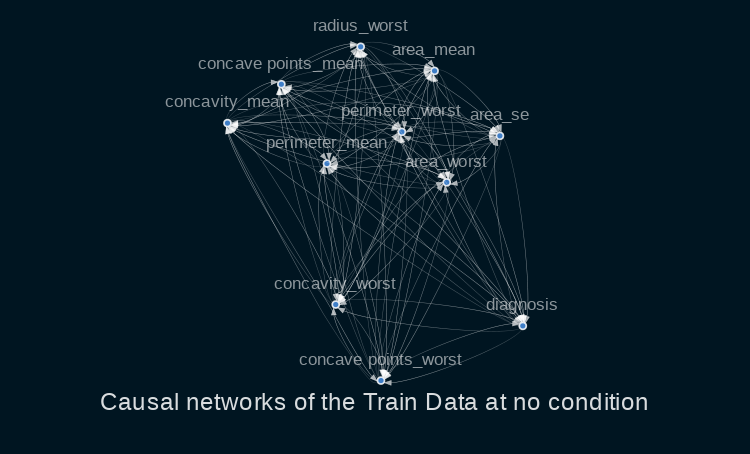

In [62]:
structuremodel(sm,"Causal networks of the Train Data at no condition")

In [63]:
sm.remove_edges_below_threshold(0.8)

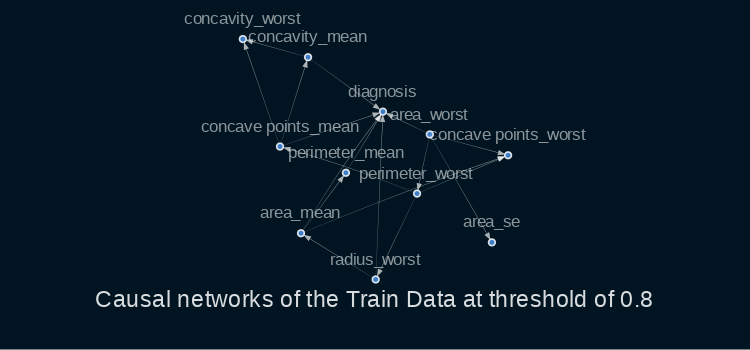

In [64]:
structuremodel(sm,"Causal networks of the Train Data at threshold of 0.8")

## Create new causal graphs using increasing fractions of the data and compare with the ground truth graph


# Jaccard's similarity index


In [65]:
def jaccard_index(a,b):
  i = a.edges
  j = b.edges 

  r = set(i).intersection(j)
  result = round(len(r) / (len(i) + len(j) - len(r)),2) 
  print(f'The jaccard simillarity index between {a} and {b} is {result}')

##### Splitting into samples fractions

In [67]:
sample_20 = causal_data.sample(frac=0.2, random_state=42)
sample_40 = causal_data.sample(frac=0.4, random_state=42)
sample_60 = causal_data.sample(frac=0.6, random_state=42)
sample_80 = causal_data.sample(frac=0.8, random_state=42)

In [68]:
sm_20 = from_pandas(sample_20,w_threshold=0.8)
sm_40 = from_pandas(sample_40,w_threshold=0.8)
sm_60 = from_pandas(sample_60,w_threshold=0.8)
sm_80 = from_pandas(sample_80,w_threshold=0.8)


In [70]:
sm_ = from_pandas(causal_data,w_threshold=0.8)

In [71]:
jaccard_index(sm_,sm_20)

The jaccard simillarity index between StructureModel with 11 nodes and 18 edges and StructureModel with 11 nodes and 31 edges is 0.48


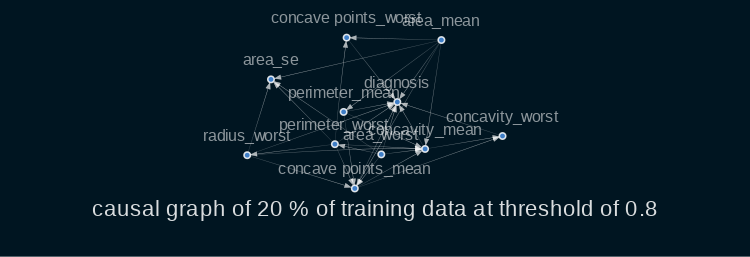

In [72]:
structuremodel(sm_20,"causal graph of 20 % of training data at threshold of 0.8")

In [73]:
jaccard_index(sm_,sm_40)

The jaccard simillarity index between StructureModel with 11 nodes and 18 edges and StructureModel with 11 nodes and 33 edges is 0.46


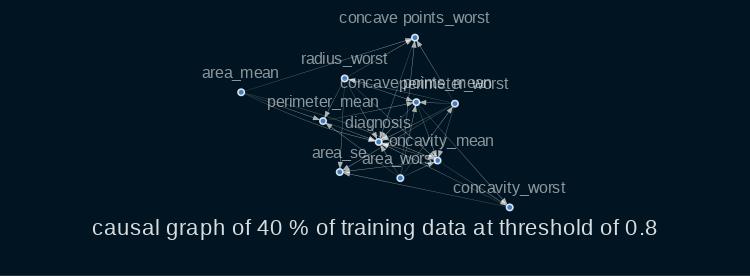

In [74]:
structuremodel(sm_40,"causal graph of 40 % of training data at threshold of 0.8")

In [75]:
jaccard_index(sm_,sm_60)

The jaccard simillarity index between StructureModel with 11 nodes and 18 edges and StructureModel with 11 nodes and 18 edges is 0.57


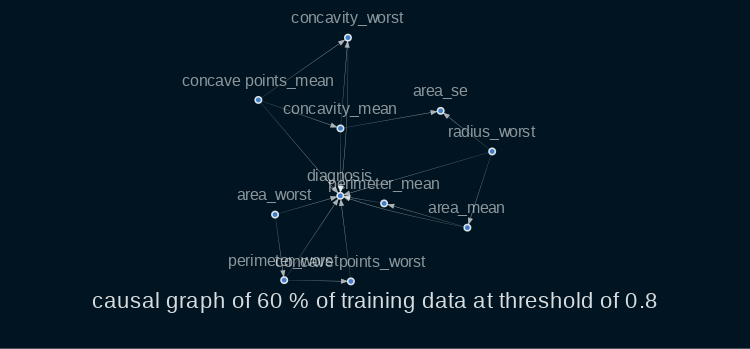

In [76]:
structuremodel(sm_60,"causal graph of 60 % of training data at threshold of 0.8")

In [77]:
jaccard_index(sm_,sm_80)

The jaccard simillarity index between StructureModel with 11 nodes and 18 edges and StructureModel with 11 nodes and 14 edges is 0.6


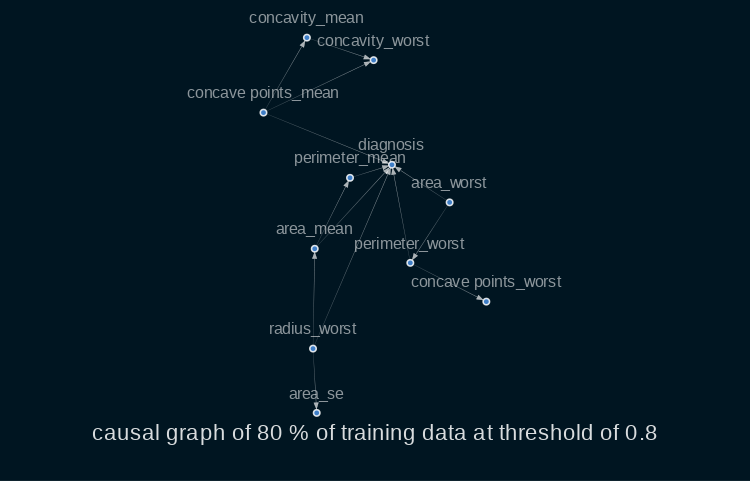

In [78]:
structuremodel(sm_80,"causal graph of 80 % of training data at threshold of 0.8")

In [79]:
sample_90 = causal_data.sample(frac=0.9, random_state=42)
sample_95 = causal_data.sample(frac=0.95, random_state=42)

In [80]:
sm_90 = from_pandas(sample_90,w_threshold=0.8)
sm_95 = from_pandas(sample_95,w_threshold=0.8)

In [81]:
jaccard_index(sm_,sm_90)

The jaccard simillarity index between StructureModel with 11 nodes and 18 edges and StructureModel with 11 nodes and 19 edges is 0.76


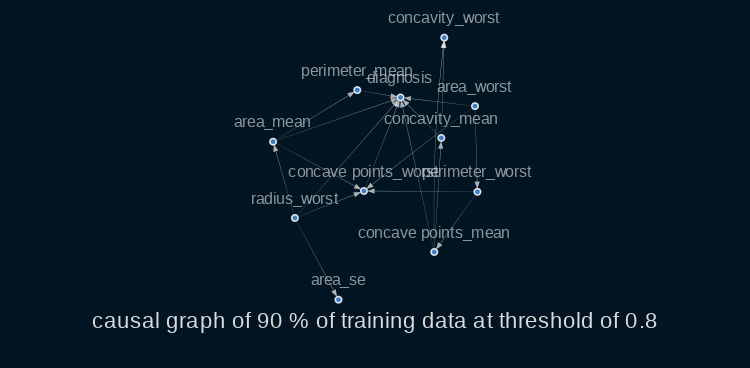

In [82]:
structuremodel(sm_90,"causal graph of 90 % of training data at threshold of 0.8")

In [83]:
jaccard_index(sm_,sm_95)

The jaccard simillarity index between StructureModel with 11 nodes and 18 edges and StructureModel with 11 nodes and 17 edges is 0.94


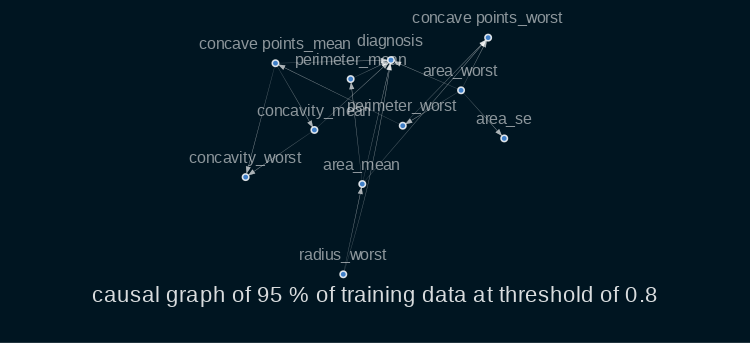

In [84]:
structuremodel(sm_95,"causal graph of 95 % of training data at threshold of 0.8")

with 95 of sample data we have 0.95 of jaccard index and graph is stable we can extract features that directly affect diagnosis

## Diagnosis direct features 

In [85]:
nodes = dict(dict(sm_95.edges).keys())
nodes

{'area_mean': 'diagnosis',
 'area_worst': 'diagnosis',
 'concave points_mean': 'diagnosis',
 'concavity_mean': 'diagnosis',
 'perimeter_mean': 'diagnosis',
 'perimeter_worst': 'concave points_worst',
 'radius_worst': 'diagnosis'}

In [86]:
direct_features = []
for keys,values in nodes.items():
  if values == "diagnosis":
    direct_features.append(keys)

In [87]:
direct_features

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'area_worst']

6 features were selected 

## dataset with features selected 

In [96]:
causal_selected_df =  data[direct_features]

In [97]:
causal_selected_df.head()

,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,area_worst,diagnosis
0,132.90,1326.0,0.0869,0.07017,24.99,1956.0,1
1,130.00,1203.0,0.1974,0.12790,23.57,1709.0,1
2,135.10,1297.0,0.1980,0.10430,22.54,1575.0,1
3,82.57,477.1,0.1578,0.08089,15.47,741.6,1
4,119.60,1040.0,0.1127,0.07400,22.88,1606.0,1


In [100]:
from google.colab import files
causal_selected_df.to_csv('causal_selected.csv', encoding = 'utf-8-sig') 
files.download('causal_selected.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>